### ----> Importing libraries 

In [73]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


### --->Data Extraction 

In [2]:
data = pd.read_csv('C://Datascience Projects/ML/Datasets/Loans_data.csv')

### --->Data auditing

In [3]:
data.shape

(50000, 10)

In [4]:
data.head()

,age,income,years_experience,credit_score,loan_amount,employment_type,city,education,marital_status,target
0,56,128388,7,658.435992,43858,Salaried,Delhi,PhD,Single,0
1,69,33280,13,723.267738,284064,Self-Employed,Delhi,Graduate,Divorced,0
2,46,22754,27,741.598799,98582,Self-Employed,Delhi,Graduate,Divorced,1
3,32,70258,34,616.773385,282408,Salaried,Delhi,High School,Married,0
4,60,63386,6,756.487805,171925,Salaried,Delhi,High School,Married,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               50000 non-null  int64  
 1   income            50000 non-null  int64  
 2   years_experience  50000 non-null  int64  
 3   credit_score      50000 non-null  float64
 4   loan_amount       50000 non-null  int64  
 5   employment_type   50000 non-null  object 
 6   city              50000 non-null  object 
 7   education         50000 non-null  object 
 8   marital_status    50000 non-null  object 
 9   target            50000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.8+ MB


In [6]:
data.isna().sum()

age                 0
income              0
years_experience    0
credit_score        0
loan_amount         0
employment_type     0
city                0
education           0
marital_status      0
target              0
dtype: int64

In [7]:
data.duplicated().sum()

0

### ---> Exploratory Data Analysis 

In [8]:
data.head()

,age,income,years_experience,credit_score,loan_amount,employment_type,city,education,marital_status,target
0,56,128388,7,658.435992,43858,Salaried,Delhi,PhD,Single,0
1,69,33280,13,723.267738,284064,Self-Employed,Delhi,Graduate,Divorced,0
2,46,22754,27,741.598799,98582,Self-Employed,Delhi,Graduate,Divorced,1
3,32,70258,34,616.773385,282408,Salaried,Delhi,High School,Married,0
4,60,63386,6,756.487805,171925,Salaried,Delhi,High School,Married,0


In [9]:
data = data.rename(columns = {"target": "loan_status"})

In [10]:
data.head()

,age,income,years_experience,credit_score,loan_amount,employment_type,city,education,marital_status,loan_status
0,56,128388,7,658.435992,43858,Salaried,Delhi,PhD,Single,0
1,69,33280,13,723.267738,284064,Self-Employed,Delhi,Graduate,Divorced,0
2,46,22754,27,741.598799,98582,Self-Employed,Delhi,Graduate,Divorced,1
3,32,70258,34,616.773385,282408,Salaried,Delhi,High School,Married,0
4,60,63386,6,756.487805,171925,Salaried,Delhi,High School,Married,0


In [11]:
avg_income = data.groupby("loan_status")["income"].mean()

In [12]:
avg_income

loan_status
0     97034.294072
1    134526.051963
Name: income, dtype: float64

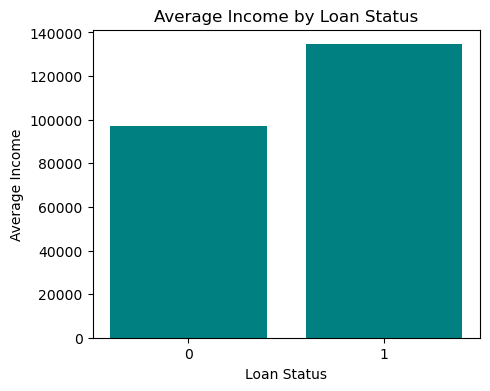

In [13]:
plt.figure(figsize=(5,4))
plt.bar([0,1], avg_income.values, color = 'teal')     
plt.xticks([0, 1], ["0", "1"])         
plt.xlabel("Loan Status")
plt.ylabel("Average Income")
plt.title("Average Income by Loan Status")
plt.show()

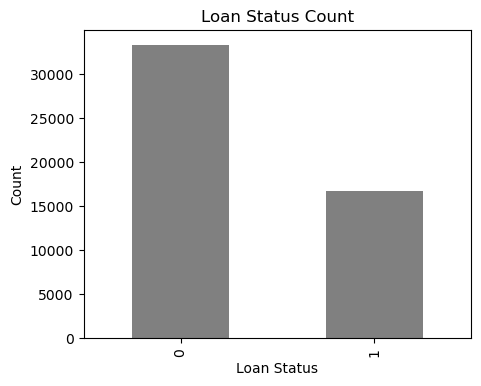

In [14]:
plt.figure(figsize=(5,4))
data["loan_status"].value_counts().plot(kind="bar", color="grey")
plt.title("Loan Status Count")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,50000.0,43.508260,14.987668,18.000000,31.000000,43.000000,56.000000,69.0
income,50000.0,109545.293680,52043.634207,20002.000000,64528.750000,109363.000000,154637.000000,199995.0
years_experience,50000.0,16.956200,10.083428,0.000000,8.000000,17.000000,26.000000,34.0
credit_score,50000.0,649.947228,79.915648,344.399734,596.190142,650.160174,703.792683,900.0
loan_amount,50000.0,252918.827020,142876.555386,5018.000000,128997.250000,252897.500000,377085.750000,499998.0
loan_status,50000.0,0.333700,0.471539,0.000000,0.000000,0.000000,1.000000,1.0


In [16]:
data.head()

,age,income,years_experience,credit_score,loan_amount,employment_type,city,education,marital_status,loan_status
0,56,128388,7,658.435992,43858,Salaried,Delhi,PhD,Single,0
1,69,33280,13,723.267738,284064,Self-Employed,Delhi,Graduate,Divorced,0
2,46,22754,27,741.598799,98582,Self-Employed,Delhi,Graduate,Divorced,1
3,32,70258,34,616.773385,282408,Salaried,Delhi,High School,Married,0
4,60,63386,6,756.487805,171925,Salaried,Delhi,High School,Married,0


In [17]:
data = data.drop(['city', 'education', 'years_experience', 'marital_status'],axis=1)

In [18]:
data.head()

,age,income,credit_score,loan_amount,employment_type,loan_status
0,56,128388,658.435992,43858,Salaried,0
1,69,33280,723.267738,284064,Self-Employed,0
2,46,22754,741.598799,98582,Self-Employed,1
3,32,70258,616.773385,282408,Salaried,0
4,60,63386,756.487805,171925,Salaried,0


In [19]:
y = data['loan_status']

In [20]:
y.isna().sum()

0

In [21]:
num_df = data.select_dtypes(exclude = 'object')
cat_df = data.select_dtypes(include = 'object')

In [22]:
num_df = num_df.drop(['loan_status'],axis=1)

In [23]:
num_df.head()

,age,income,credit_score,loan_amount
0,56,128388,658.435992,43858
1,69,33280,723.267738,284064
2,46,22754,741.598799,98582
3,32,70258,616.773385,282408
4,60,63386,756.487805,171925


In [24]:
num_df.corr().T

,age,income,credit_score,loan_amount
age,1.000000,-0.001247,0.001625,0.001323
income,-0.001247,1.000000,0.006499,-0.004037
credit_score,0.001625,0.006499,1.000000,-0.002746
loan_amount,0.001323,-0.004037,-0.002746,1.000000


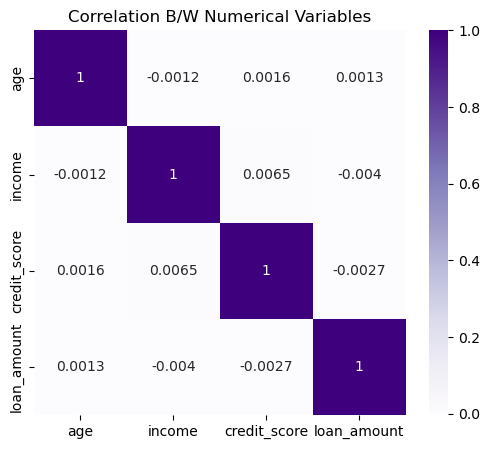

In [25]:
plt.figure(figsize=(6,5))
sns.heatmap(num_df.corr(), annot=True, cmap='Purples')
plt.title("Correlation B/W Numerical Variables")
plt.show()

###  ---> Outlier Checking 

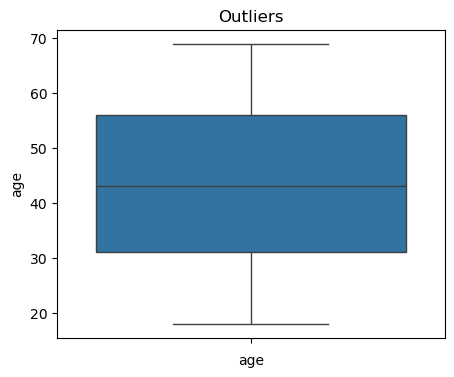

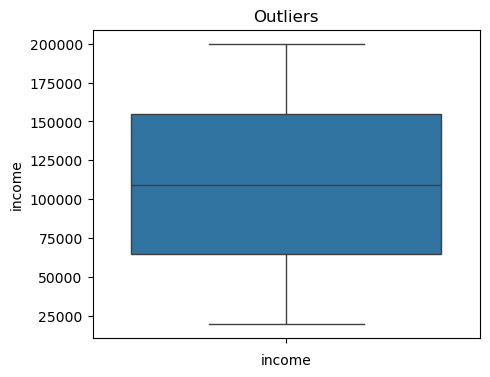

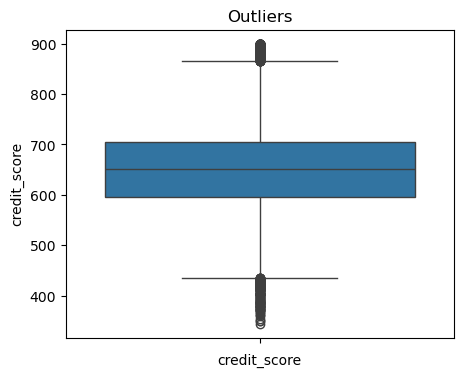

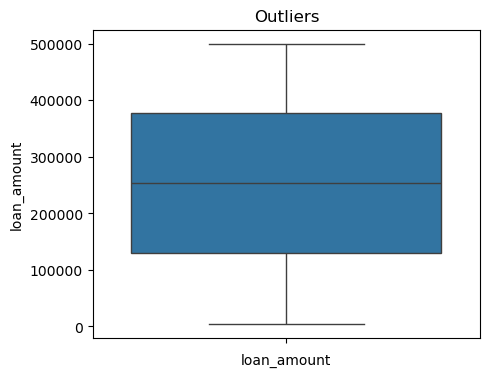

In [26]:
for col in num_df.columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(num_df[col])
    plt.xlabel(col)
    plt.title("Outliers")
    plt.show()

### ---> Outlier Treating 

In [27]:
def outlier_treat(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    uw = q3+1.5*iqr
    lw = q1-1.5*iqr
    return(x.clip(upper = uw, lower = lw))

In [28]:
num_df = num_df.apply(outlier_treat)

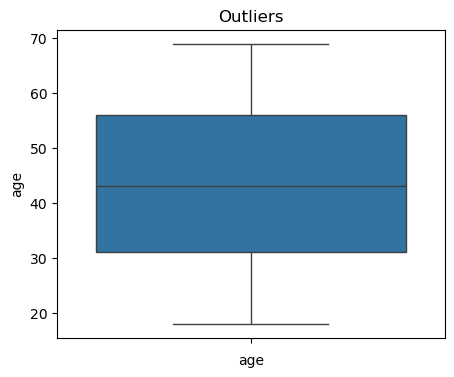

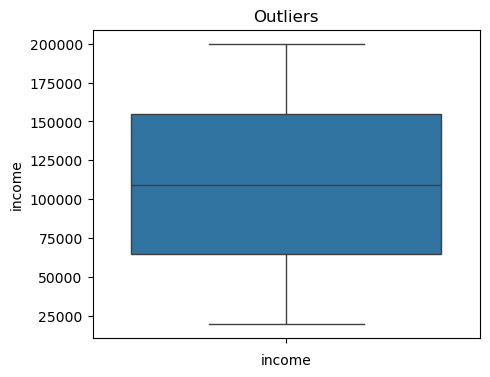

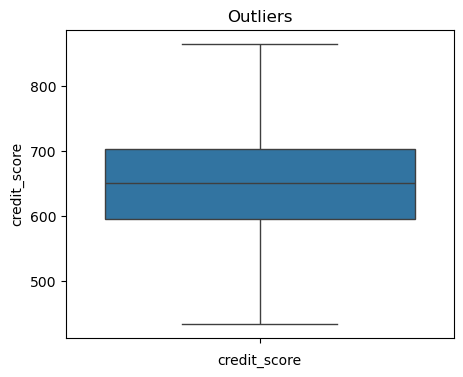

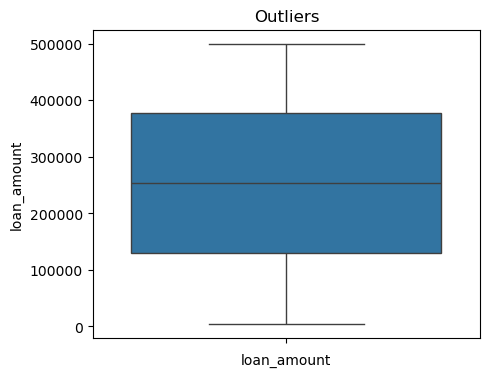

In [29]:
for col in num_df.columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(num_df[col])
    plt.xlabel(col)
    plt.title("Outliers")
    plt.show()

### ---> Pre Processing 

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

cat_df["employment_type"] = le.fit_transform(cat_df["employment_type"])

In [32]:
cat_df.head()

,employment_type
0,0
1,1
2,1
3,0
4,0


In [33]:
cat_df['employment_type'].value_counts()

employment_type
2    12545
0    12535
1    12460
3    12460
Name: count, dtype: int64

0 → Student

1 → Self-Employed

2 → Salaried

3 → Unemployed

In [34]:
df = pd.concat([num_df,cat_df],axis=1)

In [35]:
df.head()

,age,income,credit_score,loan_amount,employment_type
0,56,128388,658.435992,43858,0
1,69,33280,723.267738,284064,1
2,46,22754,741.598799,98582,1
3,32,70258,616.773385,282408,0
4,60,63386,756.487805,171925,0


### ---> Data Splitting 

In [36]:
X = df[['age','income','credit_score','loan_amount','employment_type']]

In [37]:
X.head()

,age,income,credit_score,loan_amount,employment_type
0,56,128388,658.435992,43858,0
1,69,33280,723.267738,284064,1
2,46,22754,741.598799,98582,1
3,32,70258,616.773385,282408,0
4,60,63386,756.487805,171925,0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
print(X_train.value_counts())
print(X_test.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

age  income  credit_score  loan_amount  employment_type
18   20067   674.656879    248088       1                  1
52   118037  651.707385    144755       3                  1
     116501  596.399498    263253       0                  1
     116552  544.206175    37147        2                  1
     117202  681.804282    370532       3                  1
                                                          ..
35   46543   671.251005    200503       0                  1
     46393   552.898044    75309        1                  1
     46335   668.462596    452183       1                  1
     45908   612.436593    77777        1                  1
69   199833  627.048528    91015        2                  1
Name: count, Length: 35000, dtype: int64
age  income  credit_score  loan_amount  employment_type
18   20667   675.929909    253120       2                  1
52   196684  668.788866    58391        0                  1
     184069  826.338051    126415       2             

### Model Building 

### Decision Trees 

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
dt.predict(X_train)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
accuracy_score(y_train,dt.predict(X_train))

1.0

In [49]:
dt.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
accuracy_score(y_test,dt.predict(X_test))

0.8666666666666667

### Hyper Tuning 

In [51]:
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="gini",
    random_state=42
)

In [52]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [53]:
dt_model.predict(X_train)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
accuracy_score(y_train,dt_model.predict(X_train))

0.9157142857142857

In [55]:
print(classification_report(y_train,dt_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     23323
           1       0.80      1.00      0.89     11677

    accuracy                           0.92     35000
   macro avg       0.90      0.94      0.91     35000
weighted avg       0.93      0.92      0.92     35000



In [56]:
dt_model.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [57]:
accuracy_score(y_test,dt_model.predict(X_test))

0.9106

In [58]:
print(classification_report(y_test,dt_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      9992
           1       0.79      0.99      0.88      5008

    accuracy                           0.91     15000
   macro avg       0.89      0.93      0.90     15000
weighted avg       0.93      0.91      0.91     15000



### Ensemble Models 

### Gradient Boosting 

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)


GradientBoostingClassifier()

In [60]:
gbc.predict(X_train)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
accuracy_score(y_train,gbc.predict(X_train))

0.9158285714285714

In [62]:
gbc.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [63]:
accuracy_score(y_test,gbc.predict(X_test))

0.9119333333333334

### Hyper tuning 

In [68]:
gb_model=GradientBoostingClassifier(learning_rate=0.05,
    n_estimators=300,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42)

In [69]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=2,
                           min_samples_split=5, n_estimators=300,
                           random_state=42)

In [70]:
gb_model.predict(X_train)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [71]:
accuracy_score(y_train,gb_model.predict(X_train))

0.9159428571428572

In [72]:
print(classification_report(y_train,gb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     23323
           1       0.80      1.00      0.89     11677

    accuracy                           0.92     35000
   macro avg       0.90      0.94      0.91     35000
weighted avg       0.93      0.92      0.92     35000



In [74]:
print(confusion_matrix(y_train,gb_model.predict(X_train)))

[[20385  2938]
 [    4 11673]]


In [75]:
gb_model.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [76]:
print(accuracy_score(y_test,gb_model.predict(X_test)))

0.9116


In [77]:
print(classification_report(y_test,gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      9992
           1       0.79      1.00      0.88      5008

    accuracy                           0.91     15000
   macro avg       0.90      0.93      0.91     15000
weighted avg       0.93      0.91      0.91     15000



In [78]:
print(confusion_matrix(y_test,gb_model.predict(X_test)))

[[8673 1319]
 [   7 5001]]


###  Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [80]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
rf.predict(X_train)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
accuracy_score(y_train,rf.predict(X_train))

1.0

In [83]:
rf.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [84]:
accuracy_score(y_test,rf.predict(X_test))

0.9078

### Hyper Tuning 

In [85]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=5,
    random_state=42
)

In [86]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=300, random_state=42)

In [87]:
rf_model.predict(X_train)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [88]:
accuracy_score(y_train,rf_model.predict(X_train))

0.9168857142857143

In [89]:
print(classification_report(y_train,rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     23323
           1       0.80      1.00      0.89     11677

    accuracy                           0.92     35000
   macro avg       0.90      0.94      0.91     35000
weighted avg       0.93      0.92      0.92     35000



In [90]:
print(confusion_matrix(y_train,rf_model.predict(X_train)))

[[20415  2908]
 [    1 11676]]


In [91]:
rf_model.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [92]:
accuracy_score(y_test,rf_model.predict(X_test))

0.9115333333333333

In [93]:
print(classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      9992
           1       0.79      1.00      0.88      5008

    accuracy                           0.91     15000
   macro avg       0.90      0.93      0.91     15000
weighted avg       0.93      0.91      0.91     15000



In [94]:
print(confusion_matrix(y_test,rf_model.predict(X_test)))

[[8672 1320]
 [   7 5001]]


### XG Boost 

In [97]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [98]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [99]:
xgb.predict(X_train)

array([1, 0, 0, ..., 1, 0, 0])

In [100]:
accuracy_score(y_train,xgb.predict(X_train))

0.9377142857142857

In [101]:
xgb.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0])

In [102]:
accuracy_score(y_test,xgb.predict(X_test))

0.9046

### Hyper Tuning 

In [103]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

In [104]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...)

In [105]:
xgb_model.predict(X_train)

array([1, 0, 0, ..., 1, 0, 0])

In [106]:
accuracy_score(y_train,xgb_model.predict(X_train))

0.9194857142857142

In [107]:
print(classification_report(y_train,xgb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     23323
           1       0.81      1.00      0.89     11677

    accuracy                           0.92     35000
   macro avg       0.90      0.94      0.91     35000
weighted avg       0.93      0.92      0.92     35000



In [108]:
print(confusion_matrix(y_train,xgb_model.predict(X_train)))

[[20529  2794]
 [   24 11653]]


In [109]:
xgb_model.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0])

In [110]:
accuracy_score(y_test,xgb_model.predict(X_test))

0.9099333333333334

In [111]:
print(classification_report(y_test,xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      9992
           1       0.79      0.99      0.88      5008

    accuracy                           0.91     15000
   macro avg       0.89      0.93      0.90     15000
weighted avg       0.93      0.91      0.91     15000



In [112]:
print(confusion_matrix(y_test,xgb_model.predict(X_test)))

[[8681 1311]
 [  40 4968]]


### Model Accuracies Table 

In [120]:
dt_train_acc = accuracy_score(y_train,dt_model.predict(X_train))

In [121]:
dt_test_acc = accuracy_score(y_test,dt_model.predict(X_test))

In [122]:
rf_train_acc = accuracy_score(y_train,rf_model.predict(X_train))

In [123]:
rf_test_acc = accuracy_score(y_test,rf_model.predict(X_test))

In [124]:
xgb_train_acc = accuracy_score(y_train,xgb_model.predict(X_train))

In [125]:
gb_train_acc = accuracy_score(y_train,gb_model.predict(X_train))

In [126]:
gb_test_acc = accuracy_score(y_test,gb_model.predict(X_test))

In [127]:
xgb_test_acc = accuracy_score(y_test,xgb_model.predict(X_test))

In [129]:
results = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost","Gradient Boosting"],
    "Train Accuracy": [dt_train_acc, rf_train_acc, xgb_train_acc,gb_train_acc],
    "Test Accuracy": [dt_test_acc, rf_test_acc, xgb_test_acc,gb_test_acc]
}

accuracy_df = pd.DataFrame(results)
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.915714,0.910600
1,Random Forest,0.916886,0.911533
2,XGBoost,0.919486,0.909933
3,Gradient Boosting,0.915943,0.911600
